In [1]:

import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import os

import torch
import matplotlib.pyplot as plt

from alntools.base import Extractor
import alntools as aln


In [2]:
emb = torch.load('../tests/test_data/asymetric.pt')
print(len(emb))
emb1 = emb[0].numpy()
emb2 = emb[1].numpy()

2


In [3]:
extr = Extractor()
extr.NORM = True
extr.GAP_OPEN = 0.0
extr.WINDOW_SIZE = 20

In [4]:
densraw12 = aln.numeric.embedding_local_similarity(emb1, emb2)
densraw21 = aln.numeric.embedding_local_similarity(emb2, emb1)

res12, density12, paths12, scorematrix12 = extr.embedding_to_span(emb1, emb2, mode='all')
res21, density21, paths21, scorematrix21 = extr.embedding_to_span(emb2, emb1, mode='all')
paths12 = [p - 1 for p in paths12]
mask12 = aln.prepare.mask_like(densitymap=density12, paths=paths12)

In [13]:
res21['score']

0     0.087238
1     0.089002
2     0.089002
3     0.090590
4     0.089056
5     0.091927
6     0.091927
7     0.091927
8     0.118392
9     0.118392
10    0.118392
11    0.118392
12    0.118392
13    0.118392
14    0.118392
15    0.118392
16    0.100944
17    0.100944
18    0.100944
19    0.100944
20    0.100944
21    0.100944
22    0.100944
23    0.064390
24    0.064390
25    0.064390
26    0.064390
27    0.093694
28    0.093694
29    0.093694
30    0.093694
31    0.093694
Name: score, dtype: float32

In [6]:
res21, density21, paths21, scorematrix21 = extr.embedding_to_span(emb2, emb1, mode='all')
paths21 = [p - 1 for p in paths21]
mask21= aln.prepare.mask_like(densitymap=density21, paths=paths21)

In [7]:
print(density12.max(),
density21.max(),
densraw12.max(),
densraw12.min(),
densraw21.min(),
densraw21.max(),
scorematrix12.min(),
scorematrix21.min()
)

0.53647035 0.53647035 0.53647035 -0.10249444 -0.10249444 0.53647035 0.0 0.0


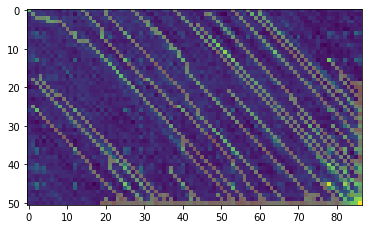

In [8]:
plt.imshow(density12)
plt.imshow(mask12, alpha=0.3)

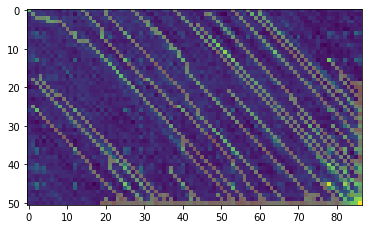

In [9]:
plt.imshow(density21.T)
plt.imshow(mask21.T, alpha=0.3)

In [10]:
np.allclose(density12, density21.T, atol=1e-6), np.allclose(scorematrix12, scorematrix21.T, atol=1e-6)

(True, True)

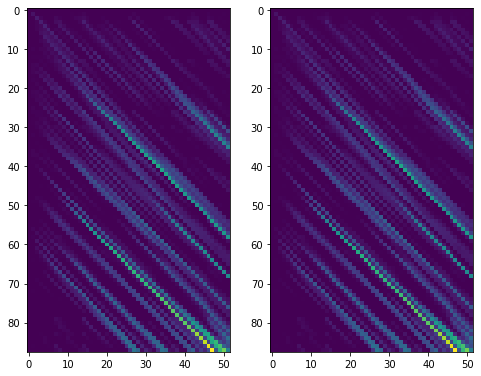

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(scorematrix12.T)
ax[1].imshow(scorematrix21)

In [12]:
paths12

[array([[19, 86],
        [19, 85],
        [19, 84],
        [18, 83],
        [17, 82],
        [16, 81],
        [15, 80],
        [14, 79],
        [13, 78]], dtype=int32),
 array([[20, 86],
        [20, 85],
        [19, 84],
        [18, 83],
        [17, 82],
        [16, 81],
        [15, 80],
        [14, 79],
        [13, 78]], dtype=int32),
 array([[21, 86],
        [20, 85],
        [19, 84],
        [18, 83],
        [17, 82],
        [16, 81],
        [15, 80],
        [14, 79],
        [13, 78]], dtype=int32),
 array([[22, 86],
        [21, 86],
        [20, 85],
        [19, 84],
        [18, 83],
        [17, 82],
        [16, 81],
        [15, 80],
        [14, 79],
        [13, 78]], dtype=int32),
 array([[23, 86],
        [22, 85],
        [21, 84],
        [20, 83],
        [19, 82],
        [18, 81],
        [17, 81],
        [16, 81],
        [15, 80],
        [14, 79],
        [13, 78]], dtype=int32),
 array([[24, 86],
        [24, 85],
        [24, 84],
       